In [77]:
import ROOT as r
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

In [78]:
f = r.TFile("laserEvents_SLM_26000_00000 (1).root")

In [79]:
f.cd('LaserEvents')

True

In [80]:
ls

06-18-2020 - UW Meeting - Introduction to ROOT and g-2 computing.pdf
06-18-2020 - UW Meeting - Introduction to ROOT and g-2 computing.pptx
Analysis_2.ROOT.ipynb
Angela_SLMPresentationSlides_6.pdf
Angela_Super-LocalMonitor (SLM)DataAnalysisReport5.pdf
Calorimeter Techs.pdf
Laser_Events.csv
Laser_Gain Moniter.pdf
Muon Precision Analysis.pdf
Practice1.ipynb
Pulse Normalization Analysis.ipynb
SLM_for_undergrads.pdf
Short Summary_ First Results.pdf
Temp.csv
Untitled.ipynb
Untitled1.ipynb
Untitled2.ipynb
gm2offline_ana_22530535_16119.00442.root
graph.png
graph.root
laserEvents_SLM_26000_00000 (1).root
laser_aggregator_tree.html
root_intro.ipynb


In [81]:
t = f.Get('Laser_Events.csv/tree')
rdf = r.RDataFrame("LaserEvents/tree", 'laserEvents_SLM_26000_00000 (1).root')

In [82]:
df = pd.DataFrame(rdf.AsNumpy())

In [131]:
calo = 1
xtal = 22
caloCount = max(df['caloNum'])
xtalCount = max(df['xtalNum'])

slopes = np.zeros((caloCount,xtalCount+1))

df_xtal = df.loc[df['caloNum']==calo].loc[df['xtalNum']==xtal]

df_xtal


,gpsTimeStamp,cccTimeStamp,runNum,subRunNum,fillNum,bunchNum,fillType,caloNum,xtalNum,sipmTime,...,lmPmtAmp1,lmPmtAmp2,lmPmtArea1,lmPmtArea2,lmPmtTime1,lmPmtTime2,slmTime,slmEnergy,slmPedestal,slmChi2
22,1.556828e+09,33595373.0,26000,0,31,0,1,1,22,-99422.208005,...,1237.80,657.80,27539.0,13797.0,5283.0,5471.0,0.0,3761.216105,-1802.074969,14.560689
1317,1.556828e+09,33995299.0,26000,0,33,1,1,1,22,-99403.302008,...,1255.98,664.98,28003.0,13942.0,5282.0,5469.0,0.0,3985.024718,-1802.651082,12.289698
2612,1.556828e+09,34395225.0,26000,0,35,2,1,1,22,-99423.584210,...,1256.14,629.14,28184.0,13265.0,5272.0,5459.0,0.0,3903.783432,-1802.175376,15.171120
3907,1.556828e+09,34795151.0,26000,0,37,3,1,1,22,-99424.062974,...,1267.36,656.36,28116.0,13749.0,5271.0,5459.0,0.0,3617.139221,-1802.725804,13.351627
5202,1.556828e+09,35195044.0,26000,0,39,4,1,1,22,-99438.799717,...,1280.80,676.80,28603.0,14363.0,5273.0,5461.0,0.0,3911.239658,-1803.189329,19.905782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212402,1.556828e+09,380682002.0,26000,0,253,9,1,1,22,-99411.768443,...,1323.40,678.40,29580.0,14532.0,5269.0,5457.0,0.0,3734.082071,-1803.058819,18.378570
213697,1.556828e+09,381081928.0,26000,0,255,10,1,1,22,-99419.881321,...,1267.38,640.38,28424.0,13687.0,5268.0,5455.0,0.0,3700.379845,-1803.319886,14.442449
214992,1.556828e+09,381481854.0,26000,0,257,11,1,1,22,-99429.119116,...,1283.96,621.96,28660.0,13244.0,5267.0,5455.0,0.0,3949.236255,-1803.660255,23.279009
216287,1.556828e+09,381881746.0,26000,0,259,12,1,1,22,-99436.413570,...,1276.58,671.58,28321.0,14072.0,5289.0,5477.0,0.0,3772.317888,-1802.914177,24.534509


In [129]:
# group table by fillNum and only select those fills with multiple signals 


df_fills = df_xtal.groupby('fillNum').count().reset_index()
syncFills = df_fills[df_fills['slmTime']>1]
df_sags = df_xtal[df_xtal['fillNum'].isin(syncFills['fillNum'])]

# and find the Energy of sync signal ( with min slmTime)
result = df_sags.loc[df_sags.groupby('fillNum').idxmin()['slmTime']][['fillNum', 'slmEnergy']]


df_normal = df_xtal.merge(result, on='fillNum', how='right')
df_normal
# what do bunchNum signify? They seem to look unique

,gpsTimeStamp,cccTimeStamp,runNum,subRunNum,fillNum,bunchNum,fillType,caloNum,xtalNum,sipmTime,...,lmPmtAmp2,lmPmtArea1,lmPmtArea2,lmPmtTime1,lmPmtTime2,slmTime,slmEnergy_x,slmPedestal,slmChi2,slmEnergy_y
0,1.556828e+09,89598899.0,26000,0,65,0,1,1,22,-99394.459498,...,666.76,28808.0,14366.0,5308.0,5496.0,0.000000,4085.813568,-1802.235213,24.856411,4085.813568
1,1.556828e+09,89598899.0,26000,0,65,0,1,1,22,-8076.938966,...,654.22,28805.0,13984.0,96626.0,96813.0,91317.457932,3680.478802,-1803.623369,14.083666,4085.813568
2,1.556828e+09,89598899.0,26000,0,65,0,1,1,22,139927.159634,...,661.68,27367.0,14059.0,244630.0,244817.0,239321.615134,3887.406178,-1802.909326,11.494897,4085.813568
3,1.556828e+09,89598899.0,26000,0,65,0,1,1,22,287923.053712,...,616.82,28153.0,13251.0,392625.0,392813.0,387317.472026,3779.836209,-1802.358890,16.030169,4085.813568
4,1.556828e+09,89598899.0,26000,0,65,0,1,1,22,435919.038403,...,643.82,27885.0,13539.0,540621.0,540809.0,535313.503660,3772.348743,-1803.008861,29.317733,4085.813568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,1.556828e+09,103066639.0,26000,0,95,15,1,1,22,-99420.148891,...,685.64,28934.0,14440.0,5306.0,5493.0,0.000000,3873.040947,-1802.984175,13.513130,3873.040947
71,1.556828e+09,103066639.0,26000,0,95,15,1,1,22,21896.507148,...,652.54,28118.0,13792.0,126623.0,126811.0,121316.686727,3945.575081,-1803.608543,18.669156,3873.040947
72,1.556828e+09,103066639.0,26000,0,95,15,1,1,22,169900.549589,...,655.52,28006.0,13912.0,274627.0,274815.0,269320.715821,3894.884536,-1802.873552,18.707248,3873.040947
73,1.556828e+09,103066639.0,26000,0,95,15,1,1,22,317896.440032,...,648.36,28349.0,13798.0,422623.0,422811.0,417316.624434,3864.730466,-1803.130722,13.593870,3873.040947


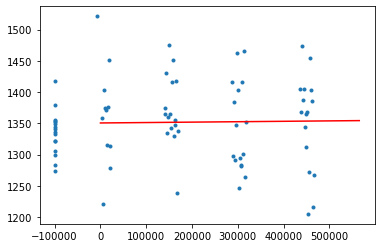

In [125]:
fig,ax = plt.subplots()

ax.plot(df_normal['sipmTime'], df_normal['slmEnergy_y']*df_normal['sipmEnergy']/df_normal['slmEnergy_x'],".")
        
def func(x,m,b):
    return m*x + b 
        
initial_guess = [1.2, 0.03]
pars, pcov = curve_fit(func, df_normal['slmTime'], df_normal['slmEnergy_y']*df_normal['sipmEnergy']/df_normal['slmEnergy_x'], p0=initial_guess)
xfit = np.linspace(np.amin(df_normal['slmTime']),np.amax(df_normal['slmTime']))
yfit = func(xfit, pars[0], pars[1])
plt.plot(xfit,yfit,'r-',label=f"Linear Fit\nm={pars[0]:.2f}\nb={pars[1]:.2f}")

slopes[calo][xtal-1]=pars[0]



In [126]:
slopes[1]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.64424217e-06, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])